In [28]:
# Import necessary packages
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # For image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

# Address of image to load
url = 'image.jpg'
# Load the image
image = io.imread(url)

(800, 606, 3)

At this point we have loaded our image. The dimension of image is (800, 606, 3). We will now use Singular Value Decomposition(SVD) to reduce the dimension of our image. To achieve this we will convert our image to gray scale image.

In [29]:
# Convert image to gray scale image
gray_scale_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

This will reduce the dimension of our image to (800, 606). But this is not enough. We will reduce it more by using SVD.
- First we will convert the gray scale image to matrix form.
- That matrix will have values between 0 and 255.

In [32]:
# Convert the image to matrix form
image_matrix = np.array(list(gray_scale_img), float)
print(image_matrix)

[[177. 177. 177. ...  95.  96.  97.]
 [177. 177. 177. ...  97.  98.  98.]
 [176. 177. 176. ...  97.  98.  99.]
 ...
 [220. 221. 222. ... 194. 192. 188.]
 [220. 221. 221. ... 194. 192. 186.]
 [220. 220. 221. ... 198. 195. 188.]]


To show geometrically, we will plot the image on graph. The point to note is that we have already reduced our image to 2D, so plot is simple.

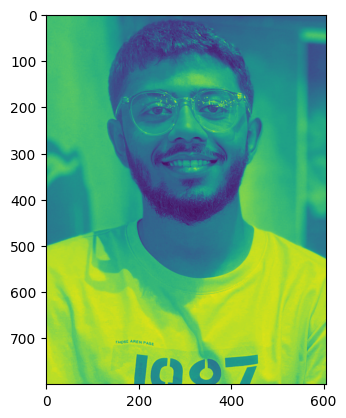

In [34]:
# Plot the image on 2D plane
plt.imshow(image_matrix)

Now it is time to compress by applying the SVD on our image or image matrix. Scaling the image matrix before applying Singular Value Decomposition (SVD) is often necessary for numerical stability, interpretability, and performance improvement in various image processing and machine learning tasks.
- Image matrices often contain large integer values (e.g., 0–255 in grayscale).
- SVD is sensitive to magnitude differences. Large values can lead to floating-point precision errors during decomposition.
- Scaling (e.g., dividing by 255) normalizes values to [0, 1], which helps numerical algorithms perform more reliably and accurately.

In [35]:
# Scale the image
image_matrix_scaled = image_matrix / 255.0

In [37]:
# Perform the SVD
U, S, V = np.linalg.svd(image_matrix_scaled)

Now after perform SVD we have our matrices. Now we need to see the variance(change) of our singular vectors gained from SVD ---- A singular vector is a vector that results from the singular value decomposition (SVD) of a matrix. Specifically, it's a column vector in either the U or V matrix within the SVD. These vectors represent directions in the data that have unique characteristics and are crucial for understanding the structure and properties of the matrix.

In [39]:
# Compute variance explained from each singular vector
var_explained = np.round(S**2/np.sum(S**2), decimals=3)

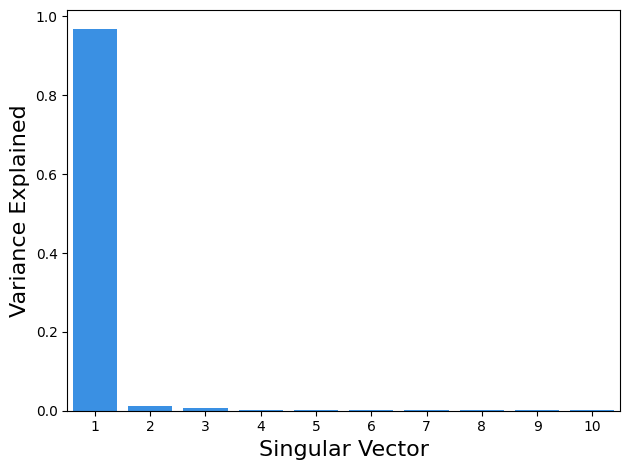

In [44]:
# Plot the variance explained by the each singular vector to see how much each singular vector has importance.
import seaborn as sns
sns.barplot(x=list(range(1, 11)),
            y=var_explained[:10], color='dodgerblue')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.savefig('svd_plot.png', dpi=150)

From the figure we can see that first three singular vector matter most(and among them first matters the most). So we will use these singular vectors to construct our compressed image. (In these types of SVD applications, we use the top k singular values to construct our matrix).

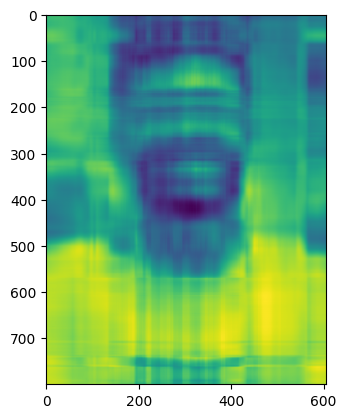

In [59]:
# Construct the image using top 5 singular value
n = 5
reconstructed_image1 = np.array(U[:, :n]).dot(np.diag(S[:n])).dot(np.array(V[:n, :]))
plt.imshow(reconstructed_image1)

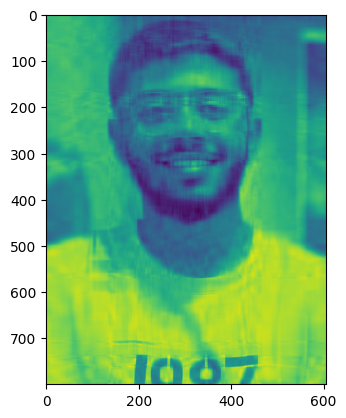

In [60]:
# Construct the image using top 20 singular value
n = 20
reconstructed_image2 = np.array(U[:, :n]).dot(np.diag(S[:n])).dot(np.array(V[:n, :]))
plt.imshow(reconstructed_image2)

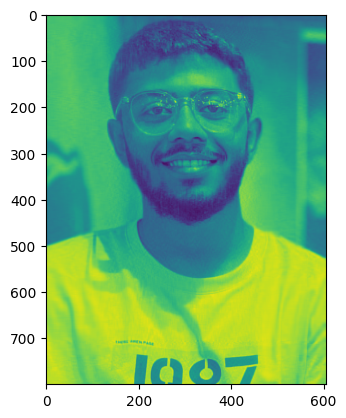

In [61]:
# Construct the image using top 80 singular value
n = 80
reconstructed_image3 = np.array(U[:, :n]).dot(np.diag(S[:n])).dot(np.array(V[:n, :]))
plt.imshow(reconstructed_image3)

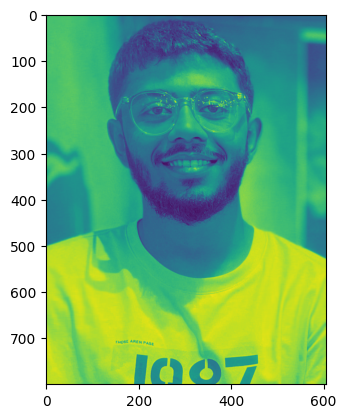

In [63]:
# Construct the image using top 200 singular value
n = 200
reconstructed_image4 = np.array(U[:, :n]).dot(np.diag(S[:n])).dot(np.array(V[:n, :]))
plt.imshow(reconstructed_image4)

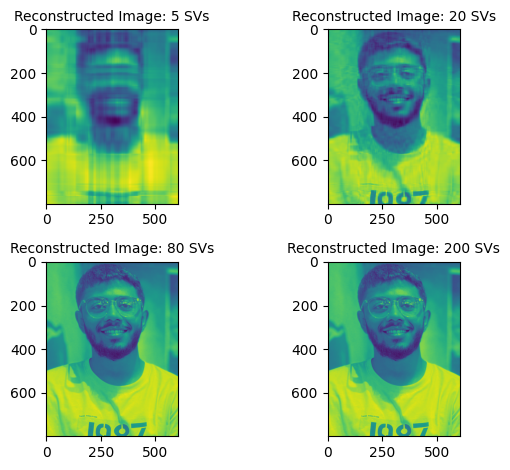

In [66]:
# Plot all the reconstructed image in grid to see difference
fig, axis = plt.subplots(2, 2)
axis[0, 0].imshow(reconstructed_image1)
axis[0, 0].set_title('Reconstructed Image: 5 SVs', size=10)

axis[0, 1].imshow(reconstructed_image2)
axis[0, 1].set_title('Reconstructed Image: 20 SVs', size=10)

axis[1, 0].imshow(reconstructed_image3)
axis[1, 0].set_title('Reconstructed Image: 80 SVs', size=10)

axis[1, 1].imshow(reconstructed_image4)
axis[1, 1].set_title('Reconstructed Image: 200 SVs', size=10)

plt.tight_layout()